In [1]:
from mpl_toolkits.mplot3d import Axes3D #Make 3D plots
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import HTML #from matplotlib import animation
from matplotlib.colors import LogNorm
#from itertools import zip_longest
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
import time
%matplotlib inline
q = 6

Funzione in esame

In [7]:
def f(x, y):
    return 1 + 0.5*q*(x**2 + y**2) - np.cos(2*np.pi*(x*y - y**2))


Grafici

In [8]:
def plot_surface(x, y, z, azim=-30, elev=20, dist=5, cmap="RdYlBu_r"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-3, 3)
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  """


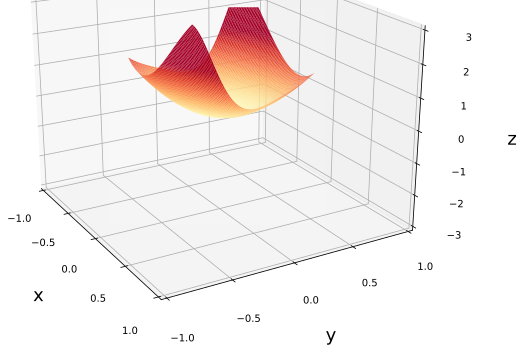

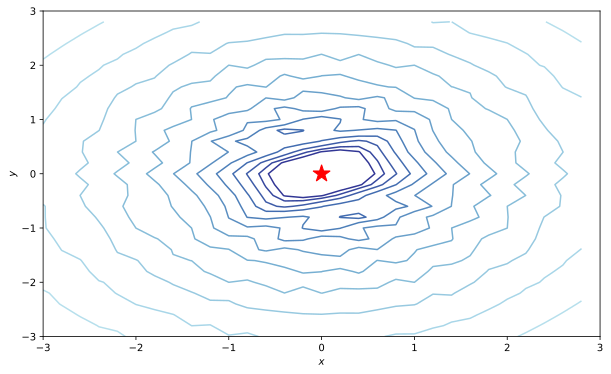

In [9]:
def contour():
    x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))   
    return fig,ax

x, y = np.mgrid[-0.5:0.5:80j, -0.5:0.5:80j]
fig1, ax1 = plot_surface(x,y,f(x,y))
fig2, ax2 = contour()


def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

Gradiente funzione in esame

In [10]:
def grad_f(params):
    x = params[0]
    y = params[1]
    grad_x = q*x + 2*np.pi*y*np.sin(2*np.pi*(x*y - y**2))
    grad_y = q*y + 2*np.pi*(x-2*y)*np.sin(2*np.pi*(x*y - y**2))
    return [grad_x, grad_y]

GD vanilla

In [11]:
def gd(grad, init, n_epochs, eta, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

In [12]:
step = 10
n_epochs=[10,20,50,70,100,120,150,250,300,400,500,600,750,1000,2000]
Q_x = np.linspace(-3, 3, step)
Q_y = np.linspace(-3, 3, step)
dist_2 = np.zeros((len(n_epochs)))
tempo = np.zeros((len(n_epochs)))


def gd_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta):   
    start_time = time.time()
    for k in range(len(n_epochs)):
        dist_1 = np.zeros((step, step))
        for i in range(len(Q_x)):
            for j in range(len(Q_y)):
                gd_1 = gd(grad_f, (Q_x[i],Q_y[j]), n_epochs[k], eta1, 0 )
                dist_1[i][j] = np.linalg.norm(gd_1[n_epochs[k]]-([0,0]))
        tempo[k] = (time.time() - start_time) /step**2       
        dist_2[k] = np.mean(dist_1)
    return dist_2, tempo

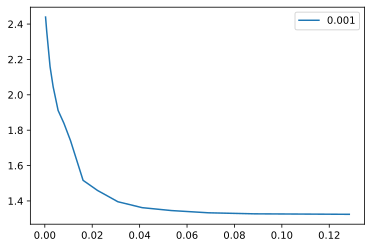

In [16]:
eta1=0.001
gd_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta1)
plt.plot(tempo, dist_2, label='0.001')
plt.legend()

plt.show()

In [69]:
def gd_with_mom(grad, init, n_epochs, eta, gamma,noise_strength):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

    

step = 10
n_epochs=[10,20,50,70,100,120,150,250,300,400,500,600,750,1000,2000]
Q_x = np.linspace(-3, 3, step)
Q_y = np.linspace(-3, 3, step)
dist_2 = np.zeros((len(n_epochs)))
tempo = np.zeros((len(n_epochs)))

def gd_with_mom_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta):  
    start_time = time.time()
    for k in range(len(n_epochs)):
        dist_1 = np.zeros((step, step))
        for i in range(len(Q_x)):
            for j in range(len(Q_y)):
                gd_with_mom_1 = gd_with_mom(grad_f, (Q_x[i],Q_y[j]), n_epochs[k], eta, 0.9,0 )
                dist_1[i][j] = np.linalg.norm(gd_with_mom_1[-1]-([0,0]))
        tempo[k] = time.time() - start_time
        dist_2[k] = np.mean(dist_1)
    return dist_2, tempo

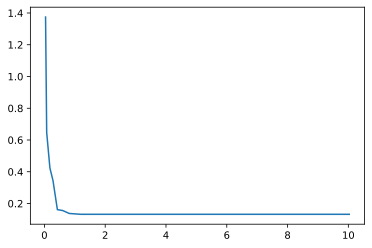

In [71]:
eta=0.01
gd_with_mom_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta)
plt.plot(tempo, dist_2)
plt.show()

In [77]:
step = 10
n_epochs=[10,20,50,70,100,120,150,250,300,400,500,600,750,1000,2000]
eta=10**-4
gamma=0.9
beta=0.99
epsilon=10**-8
Q_x = np.linspace(-3, 3, step)
Q_y = np.linspace(-3, 3, step)
dist_2 = np.zeros((len(n_epochs)))
tempo = np.zeros((len(n_epochs)))

def adams(grad, init, n_epochs, eta, gamma, beta,epsilon,noise_strength):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj


def adam_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta, gamma, beta, epsilon,noise ):  
    start_time = time.time()
    for k in range(len(n_epochs)):
        dist_1 = np.zeros((step, step))
        for i in range(len(Q_x)):
            for j in range(len(Q_y)):
                adam_1 = adams(grad_f, (Q_x[i],Q_y[j]), n_epochs[k], eta, gamma, beta, epsilon, noise )
                dist_1[i][j] = np.linalg.norm(adam_1[-1]-([0,0]))
        tempo[k] = time.time() - start_time
        dist_2[k] = np.mean(dist_1)
    return dist_2, tempo


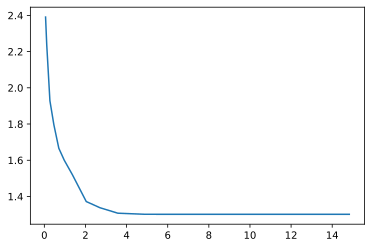

In [79]:
eta=0.01
gamma=0.9
beta=0.99
epsilon=10**-8
noise=0
adam_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta, gamma, beta,  epsilon, noise )
plt.plot(tempo, dist_2)
plt.show()

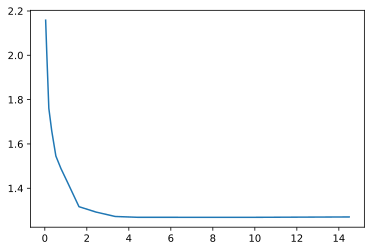

In [14]:
step = 10
n_epochs=[10,20,50,70,100,120,150,250,300,400,500,600,750,1000,2000]
eta=0.01
beta=0.99
epsilon=10**-8
Q_x = np.linspace(-3, 3, step)
Q_y = np.linspace(-3, 3, step)
dist_2 = np.zeros((len(n_epochs)))
tempo = np.zeros((len(n_epochs)))


def rms_prop(grad, init, n_epochs, eta, beta,epsilon,noise_strength):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj


def rms_prop_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta, beta, epsilon, noise ):  
    start_time = time.time()
    for k in range(len(n_epochs)):
        dist_1 = np.zeros((step, step))
        for i in range(len(Q_x)):
            for j in range(len(Q_y)):
                adam_1 = rms_prop(grad_f, (Q_x[i],Q_y[j]), n_epochs[k], eta, beta, epsilon, noise )
                dist_1[i][j] = np.linalg.norm(adam_1[-1]-([0,0]))
        tempo[k] = time.time() - start_time
        dist_2[k] = np.mean(dist_1)
    return dist_2, tempo  


noise=0
rms_prop_ex(Q_x, Q_y, grad_f, dist_2, tempo, n_epochs, eta, beta, epsilon, noise )
plt.plot(tempo, dist_2)
plt.show()

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Log scale: values of z <= 0 have been masked


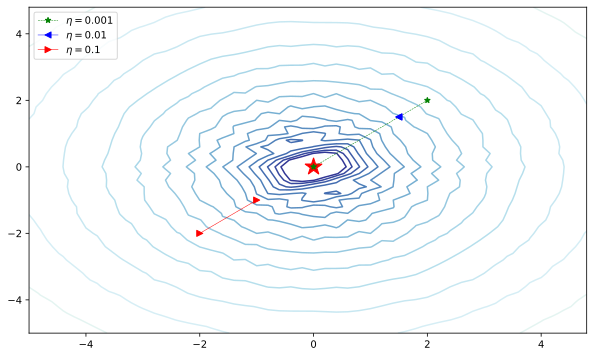

In [36]:
def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:]
    ys=trajectory[:]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[0,2]
init_fix_1=[1.5,1.5]
init_fix_2=[-1,-2]
epoch=100

eta1=0.001
eta2=0.01 #BEST FOR GD
eta3=0.1

gd_1=gd(grad_f,init_fix, epoch, eta=eta1)
gd_2=gd(grad_f,init_fix_1, epoch, eta=eta2)
gd_3=gd(grad_f,init_fix_2, epoch, eta=eta3)

plt.close()

x, y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

overlay_trajectory_contour(ax,gd_1[0],'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2[0],'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3[0],'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()